[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Lecture_Code/Code_05_1_Regression_with_dummies.ipynb)

Load libraries and data

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Loading the dataset
exp = pd.read_csv("https://richardson.byu.edu/220/student_expenses.csv")
display(exp)  # Display the data (useful in Jupyter-like environments)


,Gender,Age,Study_year,Scholarship,Transporting,expenses
0,Female,21,2,No,No,150
1,Male,25,3,No,Motorcycle,220
2,Male,23,2,Yes,No,180
3,Male,19,3,No,Motorcycle,200
4,Female,19,2,No,Motorcycle,300
...,...,...,...,...,...,...
93,Male,19,3,No,Motorcycle,200
94,Female,19,2,No,Motorcycle,300
95,Male,22,3,No,Car,150
96,Female,21,2,Yes,No,200


Plot the response

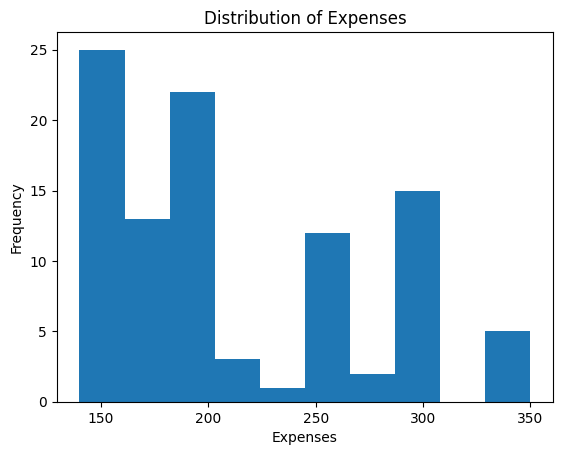

In [2]:
# Plotting the histogram of expenses
plt.hist(exp.expenses)
plt.title("Distribution of Expenses")
plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()

Examine the relationship of the response (expenses) to the continuous predictors

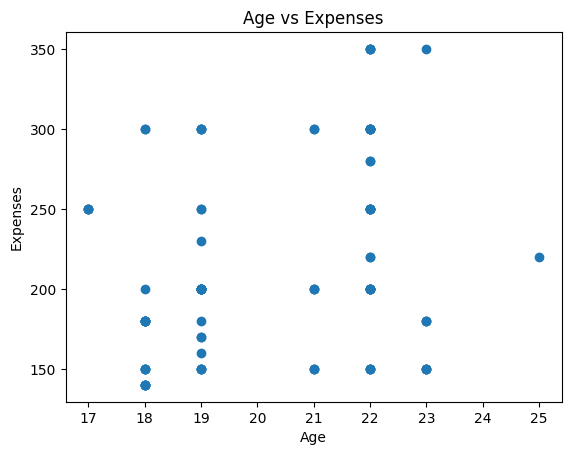

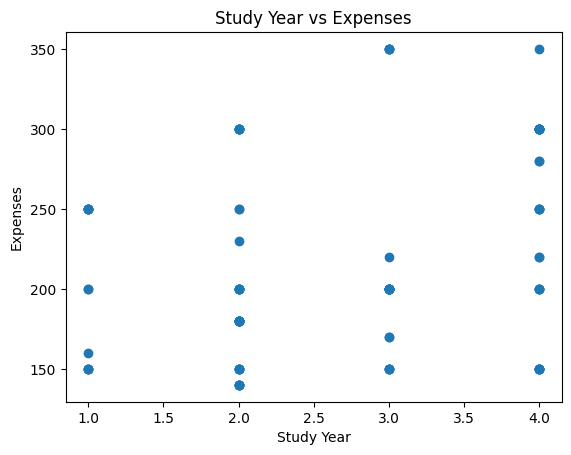

In [3]:
# Scatter plot of Age vs Expenses
plt.scatter(exp.Age, exp.expenses)
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.title("Age vs Expenses")
plt.show()

# Scatter plot of Study Year vs Expenses
plt.scatter(exp.Study_year, exp.expenses)
plt.xlabel("Study Year")
plt.ylabel("Expenses")
plt.title("Study Year vs Expenses")
plt.show()



Examine the relationship of the response (expenses) to the binary and categorical predictors

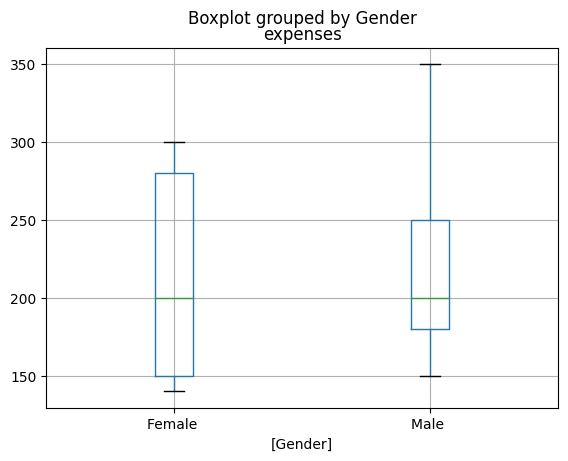

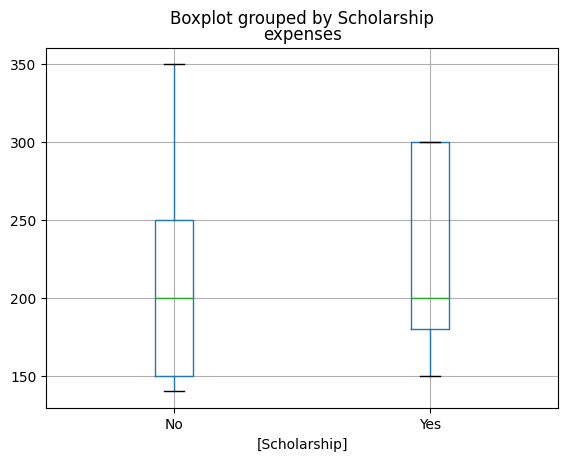

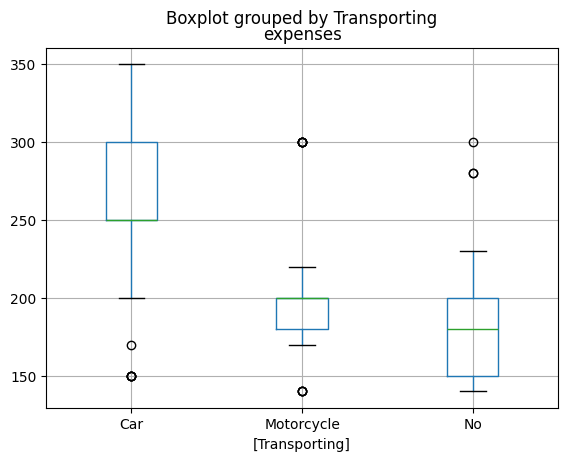

In [4]:
exp[["Gender","expenses"]].boxplot(by="Gender")
plt.show()

exp[["Scholarship","expenses"]].boxplot(by="Scholarship")
plt.show()

exp[["Transporting","expenses"]].boxplot(by="Transporting")
plt.show()

Summary of data

In [5]:
exp.describe()

,Age,Study_year,expenses
count,98.000000,98.000000,98.000000
mean,20.255102,2.653061,215.612245
std,1.938813,1.036469,60.650534
min,17.000000,1.000000,140.000000
25%,19.000000,2.000000,162.500000
50%,20.000000,2.500000,200.000000
75%,22.000000,4.000000,250.000000
max,25.000000,4.000000,350.000000


In [6]:
exp.describe(include = "all")

,Gender,Age,Study_year,Scholarship,Transporting,expenses
count,98,98.000000,98.000000,98,98,98.000000
unique,2,NaN,NaN,2,3,NaN
top,Female,NaN,NaN,No,No,NaN
freq,50,NaN,NaN,73,35,NaN
mean,NaN,20.255102,2.653061,NaN,NaN,215.612245
std,NaN,1.938813,1.036469,NaN,NaN,60.650534
min,NaN,17.000000,1.000000,NaN,NaN,140.000000
25%,NaN,19.000000,2.000000,NaN,NaN,162.500000
50%,NaN,20.000000,2.500000,NaN,NaN,200.000000
75%,NaN,22.000000,4.000000,NaN,NaN,250.000000


Fit a regression model with Age as the only predictor

In [7]:
X = exp[["Age"]]
y = exp["expenses"]

# Import regression libraries
from sklearn.linear_model import LinearRegression

# Initialize a regression
reg_prep = LinearRegression()

# Fit the regression
mod_reg = reg_prep.fit(X,y)

# Print the intercept
print('intercept:', mod_reg.intercept_)

# Print the coefficient Beta_1:
print('Age:', mod_reg.coef_)

intercept: 65.6418436739149
Age: [7.40408026]


Add Age and Study year. How does the coefficient for Age change? What does the coefficients now mean?

In [8]:
X = exp[["Age","Study_year"]]
y = exp["expenses"]

# Initialize a regression
reg_prep = LinearRegression()

# Fit the regression
mod_reg = reg_prep.fit(X,y)

# Print the intercept
print('intercept:', mod_reg.intercept_)

# Print the coefficient Beta_1:
print('Age:', mod_reg.coef_[0])

# Print the coefficient Beta_2:
print('Study_year:', mod_reg.coef_[1])

intercept: 119.84903183459134
Age: 3.274008783034057
Study_year: 11.099567099567098



Use Age, Study year, and Gender as predictors. Gender is coded as "Female" and "Male". This is not fit for a linear model.

In [9]:
X = exp[["Age","Study_year","Gender"]]
y = exp["expenses"]

# Initialize a regression
reg_prep = LinearRegression()

# Fit the regression
#Uncomment below
#mod_reg = reg_prep.fit(X,y)


Turn the Gender variable into 0's and 1's. Sometimes called "one hot encoding".

In [10]:
predictors = exp[["Age","Study_year","Gender"]]
X = pd.get_dummies(predictors)
y = exp["expenses"]

X

,Age,Study_year,Gender_Female,Gender_Male
0,21,2,True,False
1,25,3,False,True
2,23,2,False,True
3,19,3,False,True
4,19,2,True,False
...,...,...,...,...
93,19,3,False,True
94,19,2,True,False
95,22,3,False,True
96,21,2,True,False


For a binary predictor in a linear model, you use only one of the dummy variables. The other becomes a "base level"

In [11]:
predictors = exp[["Age","Study_year","Gender"]]
X = pd.get_dummies(predictors,drop_first = True)
y = exp["expenses"]

X

,Age,Study_year,Gender_Male
0,21,2,False
1,25,3,True
2,23,2,True
3,19,3,True
4,19,2,False
...,...,...,...
93,19,3,True
94,19,2,False
95,22,3,True
96,21,2,False


Perform regression using the correct variables to find the effect of Gender.

In [12]:

# Initialize a regression
reg_prep = LinearRegression()

# Fit the regression
mod_reg = reg_prep.fit(X,y)
# Print the coefficients
print('intercept:', mod_reg.intercept_)
pd.DataFrame(zip(X.columns,mod_reg.coef_))


intercept: 120.01442367230575


,0,1
0,Age,3.260135
1,Study_year,11.118083
2,Gender_Male,0.135786


Create X matrix using 2 binary variables.

In [13]:
predictors = exp[["Age","Study_year","Gender","Scholarship"]]
X = pd.get_dummies(predictors,drop_first = True)
y = exp["expenses"]

X

,Age,Study_year,Gender_Male,Scholarship_Yes
0,21,2,False,False
1,25,3,True,False
2,23,2,True,True
3,19,3,True,False
4,19,2,False,False
...,...,...,...,...
93,19,3,True,False
94,19,2,False,False
95,22,3,True,False
96,21,2,False,True


In [14]:
# Initialize a regression
reg_prep = LinearRegression()

# Fit the regression
mod_reg = reg_prep.fit(X,y)
# Print the coefficients
print('intercept:', mod_reg.intercept_)
dict(zip(X.columns,mod_reg.coef_))

intercept: 150.87690841251455


{'Age': np.float64(1.0572280776784313),
 'Study_year': np.float64(14.197934509326576),
 'Gender_Male ': np.float64(3.314471560857985),
 'Scholarship_Yes': np.float64(15.796305361431838)}

Transporting is coded as "Car","Motorcycle", and "No". We create 3 dummy variables and drop the "base level"

In [15]:
predictors = exp[["Age","Study_year","Gender","Scholarship","Transporting"]]
X = pd.get_dummies(predictors,drop_first = True)
y = exp["expenses"]

X

,Age,Study_year,Gender_Male,Scholarship_Yes,Transporting_Motorcycle,Transporting_No
0,21,2,False,False,False,True
1,25,3,True,False,True,False
2,23,2,True,True,False,True
3,19,3,True,False,True,False
4,19,2,False,False,True,False
...,...,...,...,...,...,...
93,19,3,True,False,True,False
94,19,2,False,False,True,False
95,22,3,True,False,False,False
96,21,2,False,True,False,True


Fit a full regression model on the full data set.

In [16]:
# Initialize a regression
reg_prep = LinearRegression()

# Fit the regression
mod_reg = reg_prep.fit(X,y)
# Print the coefficients
print('intercept:', mod_reg.intercept_)
pd.DataFrame(zip(X.columns,mod_reg.coef_))

intercept: 150.58512971599455


,0,1
0,Age,4.494720
1,Study_year,4.602708
2,Gender_Male,-9.686980
3,Scholarship_Yes,18.222237
4,Transporting_Motorcycle,-38.345094
5,Transporting_No,-73.894118


Fitting a tree model to the data. Have to dummify my categorical variables.

In [17]:

# Extract predictors and get dummies for categorical variables
predictors = exp[["Age", "Study_year", "Gender", "Scholarship", "Transporting"]]
X = pd.get_dummies(predictors, drop_first=True)  # Avoid dummy variable trap by dropping the first dummy variable
y = exp["expenses"]

# Initialize and train a decision tree regressor
decision_tree = DecisionTreeRegressor(max_depth=3)
decision_tree.fit(X, y)

# Visualize the tree structure
plt.figure(figsize=(28, 13))
plot_tree(decision_tree, feature_names=X.columns, fontsize=13, filled=True)
plt.show()

NameError: name 'DecisionTreeRegressor' is not defined